In [221]:
import pandas as pd
import numpy as np
import re
from math import floor
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

# 1. Read Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(3000, 23)

In [4]:
test.shape

(4398, 22)

# 2. Data Cleaning

There seems to be way more test cases than training cases ideally we'd want it the other way around. Lets clean up these data sets a bit.

In [5]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


The following columns can be dropped from our two datasets: belongs_to_collection, homepage, imdb_id, original_title, overview, poster_path, status, tagline.

In [6]:
drop_cols = ['belongs_to_collection','homepage','imdb_id','id','original_title','overview','poster_path','status','tagline','Keywords','crew','production_companies','production_countries','spoken_languages']

In [7]:
for col in drop_cols:
    train.drop(col, axis=1, inplace = True)
    test.drop(col, axis=1, inplace = True)

In [8]:
train.shape

(3000, 9)

In [9]:
test.shape

(4398, 8)

Now lets check null values and clean up the columns individually

In [10]:
train.isnull().sum()

budget                0
genres                7
original_language     0
popularity            0
release_date          0
runtime               2
title                 0
cast                 13
revenue               0
dtype: int64

In [11]:
test.isnull().sum()

budget                0
genres               16
original_language     0
popularity            0
release_date          1
runtime               4
title                 3
cast                 13
dtype: int64

## 2.1 genres
The genres column contains a dictionary for each entry. Lets first clean up the column to only have a string of genres. The dictionary contains each genre the film is apart of, some films are apart of more than one genre.

In [12]:
#function that cleans up the genre data; essentially it just extracts the values from the value-key pairs
def clean_genre(df):
    clean_list = []
    all_genres = df.genres
    for genre in all_genres:
        if genre is not np.nan:
            names = re.findall("name': '(.*?)'}", genre)
            clean_list.append(names)
        if genre is np.nan:
            clean_list.append('NULL')
    return clean_list

In [13]:
clean_genrelist = clean_genre(train)

In [14]:
train.genres = clean_genrelist

In [15]:
train.genres.head(5)

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

Now do the same for test dataset

In [16]:
clean_genrelist = clean_genre(test)

In [17]:
test.genres = clean_genrelist

In [18]:
test.genres.head(5)

0    [Adventure, Animation, Family, Fantasy]
1                  [Horror, Science Fiction]
2                          [Comedy, Romance]
3                      [Drama, War, Mystery]
4                     [History, Documentary]
Name: genres, dtype: object

Now that we've cleaned up the columns, lets do something about the **NULL** values. We can drop the train NULL values since there are only 7/3000 of them:

In [19]:
for x in range (0,len(train)):
    if train.loc[x,'genres'] == 'NULL':
        train.drop(x, axis=0, inplace = True)

In [20]:
train.shape

(2993, 9)

The 7 movies have been dropped from the train dataset, now lets manually edit the test dataset null genres

In [21]:
for x in range (0,len(test)):
    if test.loc[x,'genres'] == 'NULL':
        print(test.loc[x,:])

budget                                                               0
genres                                                            NULL
original_language                                                   en
popularity                                                    0.004425
release_date                                                    5/9/86
runtime                                                             95
title                                                Dangerously Close
cast                 [{'cast_id': 2, 'character': 'Randy McDevitt',...
Name: 73, dtype: object
budget                                                         8000000
genres                                                            NULL
original_language                                                   en
popularity                                                    0.406505
release_date                                                   2/18/83
runtime                                              

At Index **73** is the movie 'Dangerously Close', it was an Action Thriller

In [22]:
#so we dont get error messages when making the updates: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

In [23]:
mylist = list(('Action','Thriller'))

In [24]:
test.genres[73] = mylist

In [25]:
test.genres[73]

['Action', 'Thriller']

At Index **793** is the movie 'Table for Five', it was a Drama

In [26]:
#function to fill in NULL genres for test df
def fill_genre(genres_list, index):
    genres = (list(genres_list))
    test.genres[index] = genres
    print(test.genres[index])    

In [27]:
fill_genre(['Action'],793)

['Action']


In [28]:
test.genres[793]

['Action']

At Index **910** is the movie 'Valentino', it was an adventure drama

In [29]:
fill_genre(['Adventure','Drama'],910)

['Adventure', 'Drama']


At Index **1221** is the movie 'Street Knight', it was an Action Adventure

In [30]:
fill_genre(['Action','Adventure'],1221)

['Action', 'Adventure']


At Index **1442** is the movie 'My Son', it was a Drama

In [31]:
fill_genre(['Drama'],1442)

['Drama']


At Index **1615** is the movie 'Nasha Russia', it was a Comedy

In [32]:
fill_genre(['Comedy'],1615)

['Comedy']


At Index **1964** is the movie 'Nasha Russia', it was a Crime Action film.

In [33]:
fill_genre(['Crime','Action'],1964)

['Crime', 'Action']


I cannot find the movie at index **2062**, so it will remain blank.

At Index **2118** is the movie 'Duniyadari', it was a Comedy Drama film.

In [34]:
fill_genre(['Comedy','Drama'],2118)

['Comedy', 'Drama']


At Index **2213** is the movie 'Praying with Lior', it was a Documentary film.

In [35]:
fill_genre(['Documentary'],2213)

['Documentary']


At Index **2251** is the movie 'Teddy Bears' Picnic', it was a Comedy film.

In [36]:
fill_genre(['Comedy'],2251)

['Comedy']


At Index **2519** is the movie 'Glukhar v kino', it was a Comedy film.

In [37]:
fill_genre(['Comedy'],2519)

['Comedy']


At Index **3449** is the movie 'Lucky Lady', it was a Drama Comedy film.


In [38]:
fill_genre(['Drama','Comedy'],3449)

['Drama', 'Comedy']


At Index **3485** is the movie 'Death of a Dynasty', it was a Comedy film.

In [39]:
fill_genre(['Comedy'],3485)

['Comedy']


At index **3564** is the movie 'Fahrenheit 9/11', it was a documentary

In [40]:
fill_genre(['Documentary'],3564)

['Documentary']


At index **3817** is the movie 'Miesten välisiä keskusteluja', it was a Drama

In [41]:
fill_genre(['Drama'],3817)

['Drama']


Check that only one NULL from indx **2062** remains:

In [42]:
for x in range (0,len(test)):
    if test.loc[x,'genres'] == 'NULL':
        print(test.loc[x,:])

budget                                                               0
genres                                                            NULL
original_language                                                   ro
popularity                                                     0.03856
release_date                                                  10/21/05
runtime                                                             95
title                                                               15
cast                 [{'cast_id': 1, 'character': 'Hilde', 'credit_...
Name: 2062, dtype: object


Lets give the movie at **2062** the mode genre, but first we have arrange our genres alphabetically so that a movie with genres ['comedy','horror'] are counted with ['horror','comedy'] 

In [43]:
for x in range (0,len(test)):
    genres = list(test.genres[x])
    test.genres[x] = sorted(genres)

In [44]:
#find the most popular 
test.genres.value_counts()

[Drama]                                                        350
[Comedy]                                                       295
[Drama, Romance]                                               202
[Comedy, Drama]                                                189
[Comedy, Drama, Romance]                                       167
[Comedy, Romance]                                              148
[Documentary]                                                   88
[Horror, Thriller]                                              84
[Crime, Drama, Thriller]                                        70
[Drama, Thriller]                                               69
[Crime, Drama]                                                  55
[Horror]                                                        53
[Action, Thriller]                                              48
[Action, Crime, Drama, Thriller]                                47
[Action, Crime, Thriller]                                     

In [45]:
fill_genre(['Drama'],2062)

['Drama']


In [46]:
#check that no more NULL genres exist
for x in range (0,len(test)):
    if test.loc[x,'genres'] == 'NULL':
        print(test.loc[x,:])

In [47]:
test.isnull().sum()

budget                0
genres                0
original_language     0
popularity            0
release_date          1
runtime               4
title                 3
cast                 13
dtype: int64

In [48]:
train.isnull().sum()

budget                0
genres                0
original_language     0
popularity            0
release_date          0
runtime               2
title                 0
cast                 13
revenue               0
dtype: int64

## 2.2 Cast
Movies with missing Cast values will be replaced with **'NONE'**

In [49]:
train.cast.fillna('NONE', inplace=True)

In [50]:
test.cast.fillna('NONE', inplace=True)

In [51]:
train.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              2
title                0
cast                 0
revenue              0
dtype: int64

In [52]:
test.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         1
runtime              4
title                3
cast                 0
dtype: int64

## 2.3 runtime
We will manually fill in the missing runtime values for test and train if we can.

In [53]:
train[train.runtime.isnull()]

,budget,genres,original_language,popularity,release_date,runtime,title,cast,revenue
1335,6000000,[Drama],ru,0.292296,10/29/07,NaN,Королёв,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...",31000
2302,0,[Comedy],de,0.002229,3/14/96,NaN,Happy Weekend,"[{'cast_id': 0, 'character': 'Joachim Krippo',...",65335


In [54]:
#information googled
train.runtime[1335] = 130
train.runtime[2302] = 90

In [55]:
test[test.runtime.isnull()]

,budget,genres,original_language,popularity,release_date,runtime,title,cast
243,0,[Comedy],es,0.000464,3/20/81,NaN,La caliente niña Julietta,"[{'cast_id': 7, 'character': 'Julietta Santigo..."
1489,0,[Comedy],es,0.661399,6/6/14,NaN,"Pancho, el perro millonario","[{'cast_id': 3, 'character': 'Alberto', 'credi..."
1632,0,[Comedy],es,0.281500,11/3/78,NaN,Nunca en horas de clase,"[{'cast_id': 6, 'character': 'Susy', 'credit_i..."
3817,0,[Drama],fi,0.011427,1/4/13,NaN,Miesten välisiä keskusteluja,"[{'cast_id': 0, 'character': 'Kari Mairisaari'..."


In [56]:
#information googled
test.runtime[243] = 93
test.runtime[1489] = 91
test.runtime[1632] = 100
test.runtime[3817] = 116

In [57]:
test.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         1
runtime              0
title                3
cast                 0
dtype: int64

In [58]:
train.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              0
title                0
cast                 0
revenue              0
dtype: int64

## 2.3 Release Date
Theres just one missing release date from the test dataset which we can fill manually.

In [59]:
test[test.release_date.isnull()]

,budget,genres,original_language,popularity,release_date,runtime,title,cast
828,0,[Drama],en,0.009057,NaN,90.0,"Jails, Hospitals & Hip-Hop",[]


In [60]:
#information googled
test.release_date[828] = '05/01/00'

In [61]:
train.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              0
title                0
cast                 0
revenue              0
dtype: int64

In [62]:
test.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              0
title                3
cast                 0
dtype: int64

## 2.4 Title
We can drop this column because we only needed it to google missing information, it wont help with modelling.

In [63]:
train.drop('title', axis=1, inplace = True)
test.drop('title', axis=1, inplace = True)

In [64]:
test.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              0
cast                 0
dtype: int64

In [65]:
train.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
runtime              0
cast                 0
revenue              0
dtype: int64

# 3. Feature Engineering
## 3.1 Oringinal Language 
Since a big moajority (86% of the data according to kaggle) has english as the orignal language, I will breakdown the original language to either ENGLISH or FOREIGN and then get dummy variables for the two. 

In [66]:
test.head()

,budget,genres,original_language,popularity,release_date,runtime,cast
0,0,"[Adventure, Animation, Family, Fantasy]",ja,3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_..."
1,88000,"[Horror, Science Fiction]",en,3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc..."
2,0,"[Comedy, Romance]",en,8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi..."
3,6800000,"[Drama, Mystery, War]",fr,8.596012,9/4/10,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_..."
4,2000000,"[Documentary, History]",en,3.217680,2/11/05,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)..."


In [67]:
train.head()

,budget,genres,original_language,popularity,release_date,runtime,cast,revenue
0,14000000,[Comedy],en,6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651
1,40000000,"[Comedy, Drama, Family, Romance]",en,8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435
2,3300000,[Drama],en,64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000
3,1200000,"[Thriller, Drama]",hi,3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000
4,0,"[Action, Thriller]",ko,1.148070,2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970


In [68]:
#replace all foreign languages with FOREIGN
for x in range (0,len(train)):
    if x in list(train.index):
        if train.loc[x,'original_language'] != 'en':
            train.loc[x,'original_language'] = 'FOREIGN'

    

In [69]:
train.loc[2996,'original_language'] = 'FOREIGN'

In [70]:
for x in range (0,len(test)):
        if test.loc[x,'original_language'] != 'en':
            test.loc[x,'original_language'] = 'FOREIGN'

In [71]:
train = pd.get_dummies(train, columns=['original_language'])

In [72]:
test = pd.get_dummies(test, columns=['original_language'])

In [73]:
#train.drop(['original_language'],axis = 1)
#test.drop(['original_language'],axis = 1)

In [74]:
test.head(3)

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1


In [75]:
train.head(3)

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1


## 3.2 Release Date
I will create two columns from the release date - one for year released and one for month released. I will then derive the northern hempisphere season (winter, summer, autumn or spring) from the months.

In [76]:
dates = list(train.release_date)

In [77]:
#extract years
years = list()
for date in dates:
    years.append(re.findall('..$',date))

In [78]:
#add years to train df
train['years']=years

In [79]:
train.head()

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,[15]
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,[04]
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,[14]
3,1200000,"[Thriller, Drama]",3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,[12]
4,0,"[Action, Thriller]",1.148070,2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,[09]


In [80]:
#do the same for test
dates = list(test.release_date)
#extract years
years = list()
for date in dates:
    years.append(re.findall('..$',date))
#add years to train df
test['years']=years
test.head()

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,[07]
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,[58]
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,[97]
3,6800000,"[Drama, Mystery, War]",8.596012,9/4/10,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,[10]
4,2000000,"[Documentary, History]",3.217680,2/11/05,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,[05]


In [81]:
#now get months for train data
dates = list(train.release_date)
#extract months
months = list()
for date in dates:
    months.append(re.findall('^..',date))
#add months to train df
train['months']=months
train.head()

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years,months
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,[15],[2/]
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,[04],[8/]
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,[14],[10]
3,1200000,"[Thriller, Drama]",3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,[12],[3/]
4,0,"[Action, Thriller]",1.148070,2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,[09],[2/]


In [82]:
#now get months for test data
dates = list(test.release_date)
#extract months
months = list()
for date in dates:
    months.append(re.findall('^..',date))
#add months to train df
test['months']=months
test.head()

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years,months
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,[07],[7/]
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,[58],[5/]
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,[97],[5/]
3,6800000,"[Drama, Mystery, War]",8.596012,9/4/10,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,[10],[9/]
4,2000000,"[Documentary, History]",3.217680,2/11/05,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,[05],[2/]


Lets clean up the years and months columns a bit by removing the square brackets

In [83]:
#clean years for train dataset
dirty_years = list(train.years)
clean_years = list()
for dirty_year in dirty_years:
    year = re.findall('[0-9]',str(dirty_year))
    clean_years.append(''.join(year))
train.years = clean_years

In [84]:
train.head(3)

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years,months
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,15,[2/]
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,04,[8/]
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,14,[10]


In [85]:
#clean years for test dataset
dirty_years = list(test.years)
clean_years = list()
for dirty_year in dirty_years:
    year = re.findall('[0-9]',str(dirty_year))
    clean_years.append(''.join(year))
test.years = clean_years

In [86]:
test.head(3)

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years,months
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,07,[7/]
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,58,[5/]
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,97,[5/]


In [87]:
#clean months for train dataset
dirty_months = list(train.months)
clean_months = list()
for dirty_month in dirty_months:
    month = re.findall('[0-9]',str(dirty_month))
    clean_months.append(''.join(month))
train.months = clean_months

In [88]:
train.head(3)

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years,months
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,15,2
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,04,8
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,14,10


In [89]:
#clean months for test dataset
dirty_months = list(test.months)
clean_months = list()
for dirty_month in dirty_months:
    month = re.findall('[0-9]',str(dirty_month))
    clean_months.append(''.join(month))
test.months = clean_months

In [90]:
test.head(3)

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years,months
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,07,7
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,58,5
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,97,5


I will re-structure the months column to represent a year that has september as its last month, this is to account for the fact that summer ends in September and summer block-buster movies are usually the highest grossing films and so I will try and create some linear proportionality between the box office numbers and the month in order to make modelling easier (I hope)

In [91]:
#restructure train.months
months = pd.to_numeric(train.months, downcast='unsigned')
new_months = list()
for month in months:
    if month < 10:
        new_months.append(month + 3)
    if month >= 10:
        new_months.append(month - 9)

In [92]:
#add to df
train['new_months']=new_months

In [93]:
train.head()

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years,months,new_months
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,15,2,5
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,04,8,11
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,14,10,1
3,1200000,"[Thriller, Drama]",3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,12,3,6
4,0,"[Action, Thriller]",1.148070,2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,09,2,5


In [94]:
#restructure test.months
months = pd.to_numeric(test.months, downcast='unsigned')
new_months = list()
for month in months:
    if month < 10:
        new_months.append(month + 3)
    if month >= 10:
        new_months.append(month - 9)
#add to df
test['new_months']=new_months
test.head(3)

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years,months,new_months
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,07,7,10
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,58,5,8
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,97,5,8


Now I am going to round the **years** down to the decade 

In [95]:
#function to round down
def round_down(num, divisor):
    return floor(num / divisor) * divisor

In [96]:
years = pd.to_numeric(train.years,downcast='unsigned')
rounded_years = list()
for year in years:
    rounded_years.append(round_down(year, 10))

For movies released in the 2000s and 2010s, I will round them to 100 and 110 respectively. It's safe to do this because the earliest movies are from the 1920s and so we wont have to worry about representing movies from the 1910s along side those from the 2010s.

In [97]:
for x in range(0, len(rounded_years)):
    if rounded_years[x] == 0:
        rounded_years[x] = 100
    if rounded_years[x] == 10:
        rounded_years[x] = 110

In [98]:
#add to train df
train['decades'] = rounded_years

In [99]:
train.head()

,budget,genres,popularity,release_date,runtime,cast,revenue,original_language_FOREIGN,original_language_en,years,months,new_months,decades
0,14000000,[Comedy],6.575393,2/20/15,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,15,2,5,110
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,8/6/04,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,04,8,11,100
2,3300000,[Drama],64.299990,10/10/14,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,14,10,1,110
3,1200000,"[Thriller, Drama]",3.174936,3/9/12,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,12,3,6,110
4,0,"[Action, Thriller]",1.148070,2/5/09,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,09,2,5,100


In [100]:
#repeat the process for test
years = pd.to_numeric(test.years,downcast='unsigned')
rounded_years = list()
for year in years:
    rounded_years.append(round_down(year, 10))
    
for x in range(0, len(rounded_years)):
    if rounded_years[x] == 0:
        rounded_years[x] = 100
    if rounded_years[x] == 10:
        rounded_years[x] = 110

#add to test df
test['decades'] = rounded_years
test.head()

,budget,genres,popularity,release_date,runtime,cast,original_language_FOREIGN,original_language_en,years,months,new_months,decades
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,7/14/07,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,07,7,10,100
1,88000,"[Horror, Science Fiction]",3.559789,5/19/58,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,58,5,8,50
2,0,"[Comedy, Romance]",8.085194,5/23/97,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,97,5,8,90
3,6800000,"[Drama, Mystery, War]",8.596012,9/4/10,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,10,9,12,110
4,2000000,"[Documentary, History]",3.217680,2/11/05,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,05,2,5,100


In [101]:
#we can now drop the release_date, years and months columns from our two dfs
drop_cols = ['release_date','years','months']
for col in drop_cols:
    train.drop(col, axis=1, inplace = True)
    test.drop(col, axis=1, inplace = True)

In [102]:
test.head()

,budget,genres,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades
0,0,"[Adventure, Animation, Family, Fantasy]",3.851534,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,10,100
1,88000,"[Horror, Science Fiction]",3.559789,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,8,50
2,0,"[Comedy, Romance]",8.085194,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,8,90
3,6800000,"[Drama, Mystery, War]",8.596012,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,12,110
4,2000000,"[Documentary, History]",3.217680,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,5,100


In [103]:
train.head()

,budget,genres,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades
0,14000000,[Comedy],6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,5,110
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,11,100
2,3300000,[Drama],64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,1,110
3,1200000,"[Thriller, Drama]",3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,6,110
4,0,"[Action, Thriller]",1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,5,100


## 3.3 Budget
Lets just fill in the missing values with the mean budget respective to the decade it was released in. We start by creating a dictionary or the mean budgets of each decade:

In [104]:
#start with the train df
train_budget_dict = {}
unique_decades = list(train.decades.unique())
for decade in unique_decades:
    train_budget_dict[decade] = round(train.budget[train.decades == decade].mean(),2)

In [105]:
#check that dict is populated
train_budget_dict

{110: 27277969.07,
 100: 29281170.09,
 80: 7872790.78,
 90: 21798811.37,
 70: 4585680.9,
 60: 5512374.43,
 50: 2247582.95,
 20: 288180.4,
 30: 769465.5,
 40: 1138492.09}

In [106]:
#use dict to add missing values of budget
for x in range(0,len(train)):
    if x in list(train.index): 
        if train.budget[x] == 0:
            train.budget[x] = train_budget_dict[train.decades[x]] 

In [107]:
#check df
train[train.budget == 0]

,budget,genres,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades
2994,0,[Drama],7.438381,106.0,"[{'cast_id': 2, 'character': 'David Greene', '...",14715067,0,1,12,90
2995,0,"[Comedy, Romance]",9.853270,102.0,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...",1596687,0,1,7,90
2996,0,"[Drama, Music]",3.727996,102.0,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...",180590,1,0,6,110


In [108]:
#for some reason these have to be done manually ... wtf
train.budget[2994] = train_budget_dict[train.decades[2994]]
train.budget[2995] = train_budget_dict[train.decades[2995]]
train.budget[2996] = train_budget_dict[train.decades[2996]]

In [109]:
#do the same for test df
test_budget_dict = {}
unique_decades = list(test.decades.unique())
for decade in unique_decades:
    test_budget_dict[decade] = round(test.budget[test.decades == decade].mean(),2)

In [110]:
#check that dict is populated
test_budget_dict

{100: 29664853.8,
 50: 2062641.84,
 90: 20126027.22,
 110: 28263067.64,
 80: 7953308.57,
 70: 4803958.16,
 40: 1746654.79,
 20: 9065303.36,
 60: 4319967.08,
 30: 1235596.68}

In [111]:
#use dict to add missing values of budget
for x in range(0,len(test)):
        if test.budget[x] == 0:
            test.budget[x] = test_budget_dict[test.decades[x]] 

In [112]:
#check df
test[test.budget == 0]

,budget,genres,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades


In [113]:
train.head()

,budget,genres,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades
0,14000000,[Comedy],6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,5,110
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,11,100
2,3300000,[Drama],64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,1,110
3,1200000,"[Thriller, Drama]",3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,6,110
4,29281170,"[Action, Thriller]",1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,5,100


In [114]:
test.head()

,budget,genres,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades
0,29664853,"[Adventure, Animation, Family, Fantasy]",3.851534,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,10,100
1,88000,"[Horror, Science Fiction]",3.559789,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,8,50
2,20126027,"[Comedy, Romance]",8.085194,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,8,90
3,6800000,"[Drama, Mystery, War]",8.596012,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,12,110
4,2000000,"[Documentary, History]",3.217680,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,5,100


In [115]:
train.isnull().sum()

budget                       0
genres                       0
popularity                   0
runtime                      0
cast                         0
revenue                      0
original_language_FOREIGN    0
original_language_en         0
new_months                   0
decades                      0
dtype: int64

In [116]:
test.isnull().sum()

budget                       0
genres                       0
popularity                   0
runtime                      0
cast                         0
original_language_FOREIGN    0
original_language_en         0
new_months                   0
decades                      0
dtype: int64

## 3.4 Genres
Start by creating a dictionary for every genre

In [117]:
train.head()

,budget,genres,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades
0,14000000,[Comedy],6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,5,110
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,11,100
2,3300000,[Drama],64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,1,110
3,1200000,"[Thriller, Drama]",3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",16000000,1,0,6,110
4,29281170,"[Action, Thriller]",1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...",3923970,1,0,5,100


In [118]:
test.head()

,budget,genres,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades
0,29664853,"[Adventure, Animation, Family, Fantasy]",3.851534,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,10,100
1,88000,"[Horror, Science Fiction]",3.559789,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,8,50
2,20126027,"[Comedy, Romance]",8.085194,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,8,90
3,6800000,"[Drama, Mystery, War]",8.596012,130.0,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...",1,0,12,110
4,2000000,"[Documentary, History]",3.217680,92.0,"[{'cast_id': 1, 'character': 'Narrator (voice)...",0,1,5,100


In [119]:
all_genre_dict = {}
for genrelist in test.genres:
    for genre in genrelist:
        if str(genre) in all_genre_dict:
            all_genre_dict[str(genre)] += 1
        if str(genre) not in all_genre_dict:
            all_genre_dict[str(genre)] = 1
            
for genrelist in train.genres:
    for genre in genrelist:
        if str(genre) in all_genre_dict:
            all_genre_dict[str(genre)] += 1
        if str(genre) not in all_genre_dict:
            all_genre_dict[str(genre)] = 1

In [120]:
all_genre_dict

{'Adventure': 1118,
 'Animation': 382,
 'Family': 675,
 'Fantasy': 628,
 'Horror': 735,
 'Science Fiction': 744,
 'Comedy': 2611,
 'Romance': 1435,
 'Drama': 3682,
 'Mystery': 550,
 'War': 243,
 'Documentary': 223,
 'History': 295,
 'Thriller': 1870,
 'Action': 1739,
 'Music': 267,
 'Crime': 1085,
 'Western': 117,
 'Foreign': 84,
 'TV Movie': 1}

Create bins for each genre using MutliLabelBinarizer

In [121]:
train_genres = train.genres
mlb = MultiLabelBinarizer()
train_genre_bin = pd.DataFrame(mlb.fit_transform(train_genres),columns=mlb.classes_, index=train.index)
train_genre_bin.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [122]:
test_genres = test.genres
mlb = MultiLabelBinarizer()
test_genre_bin = pd.DataFrame(mlb.fit_transform(test_genres),columns=mlb.classes_, index=test.index)
test_genre_bin.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [123]:
#add the columns to the train dataframes
for column in train_genre_bin.columns:
    train[column] = train_genre_bin[column]

In [124]:
#add the columns to the test dataframes
for column in test_genre_bin.columns:
    test[column] = test_genre_bin[column]

In [125]:
train.head(3)

,budget,genres,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,[Comedy],6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,5,110,...,0,0,0,0,0,0,0,0,0,0
1,40000000,"[Comedy, Drama, Family, Romance]",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,11,100,...,0,0,0,0,1,0,0,0,0,0
2,3300000,[Drama],64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,1,110,...,0,0,0,0,0,0,0,0,0,0


In [126]:
test.head(3)

,budget,genres,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades,Action,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,29664853,"[Adventure, Animation, Family, Fantasy]",3.851534,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,10,100,0,...,0,0,0,0,0,0,0,0,0,0
1,88000,"[Horror, Science Fiction]",3.559789,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,8,50,0,...,0,0,1,0,0,0,1,0,0,0
2,20126027,"[Comedy, Romance]",8.085194,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,8,90,0,...,0,0,0,0,0,1,0,0,0,0


We can now drop the genres column from both dfs

In [127]:
train.drop('genres', axis=1, inplace = True)
test.drop('genres', axis=1, inplace = True)

In [128]:
train.head(3)

,budget,popularity,runtime,cast,revenue,original_language_FOREIGN,original_language_en,new_months,decades,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...",12314651,0,1,5,110,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...",95149435,0,1,11,100,0,...,0,0,0,0,1,0,0,0,0,0
2,3300000,64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...",13092000,0,1,1,110,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test.head(3)

,budget,popularity,runtime,cast,original_language_FOREIGN,original_language_en,new_months,decades,Action,Adventure,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,29664853,3.851534,90.0,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...",1,0,10,100,0,1,...,0,0,0,0,0,0,0,0,0,0
1,88000,3.559789,65.0,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...",0,1,8,50,0,0,...,0,0,1,0,0,0,1,0,0,0
2,20126027,8.085194,100.0,"[{'cast_id': 11, 'character': 'Maggie', 'credi...",0,1,8,90,0,0,...,0,0,0,0,0,1,0,0,0,0


## 3.5 Cast
Using a list from imdb of the 1000 most popular actors and actresses (https://www.imdb.com/list/ls058011111/), I will derive a column to count the number of A list celebrities each movie has, starting with the train df:


In [143]:
#extract all actors/actresses from the cast column for each row:
train_cast = train.cast
train_cast_names = list()
for cast in train_cast:
    names = re.findall("name': '(.*?)',", cast)
    train_cast_names.append(names)
    

In [149]:
train_cast_names[0]

['Rob Corddry',
 'Craig Robinson',
 'Clark Duke',
 'Adam Scott',
 'Chevy Chase',
 'Gillian Jacobs',
 'Bianca Haase',
 'Collette Wolfe',
 'Kumail Nanjiani',
 'Kellee Stewart',
 'Josh Heald',
 'Gretchen Koerner',
 'Lisa Loeb',
 'Jessica Williams',
 'Bruce Buffer',
 'Mariana Paola Vicente',
 'Christian Slater',
 'Jason Jones',
 'Olivia Jordan',
 'Christine Bently',
 'Stacey Asaro',
 'John Cusack',
 'Adam Herschman',
 'Kisha Sierra']

In [150]:
#do the same for test
#extract all actors/actresses from the cast column for each row:
test_cast = test.cast
test_cast_names = list()
for cast in test_cast:
    names = re.findall("name': '(.*?)',", cast)
    test_cast_names.append(names)

In [151]:
test_cast_names[0]

['Craig Blair',
 'Emily Bauer',
 'Sarah Natochenny',
 'Ikue ≈åtani',
 'Bill Rogers',
 'Joshua Swanson',
 'Bill Timoney']

In [153]:
#read in the list of A-List actors
top_actrs = pd.read_csv('Top 1000 Actors and Actresses.csv')
top_actrs.head()

,Position,Const,Created,Modified,Description,Name,Known For,Birth Date
0,1,nm0000134,2014-03-09,2014-03-09,NaN,Robert De Niro,Raging Bull,1943-08-17
1,2,nm0000197,2014-03-09,2015-10-25,NaN,Jack Nicholson,Chinatown,1937-04-22
2,3,nm0000008,2014-03-09,2014-03-09,NaN,Marlon Brando,Apocalypse Now,1924-04-03
3,4,nm0000243,2014-03-09,2014-03-09,NaN,Denzel Washington,Fences,1954-12-28
4,5,nm0000022,2015-08-13,2015-08-13,NaN,Clark Gable,It Happened One Night,1901-02-01


In [154]:
#we only need the names, so we extract them
top_actrs_names = top_actrs.Name
top_actrs_names.head()

0       Robert De Niro
1       Jack Nicholson
2        Marlon Brando
3    Denzel Washington
4          Clark Gable
Name: Name, dtype: object

In [166]:
#start with train df
train_top_actr_count = list()
for cast in train_cast_names:
    top_actr_count = 0
    for person in cast:
        if person in list(top_actrs_names):
            top_actr_count += 1
    train_top_actr_count.append(top_actr_count)

In [170]:
train_top_actr_count[:4]

[2, 5, 2, 0]

In [171]:
#do the same thing for test df
test_top_actr_count = list()
for cast in test_cast_names:
    top_actr_count = 0
    for person in cast:
        if person in list(top_actrs_names):
            top_actr_count += 1
    test_top_actr_count.append(top_actr_count)

In [172]:
test_top_actr_count[:4]

[0, 0, 3, 0]

In [173]:
#now we add these two lists to our dfs
train['top_actrs'] = train_top_actr_count
test['top_actrs'] = test_top_actr_count

Now we simply drop the cast column and the majority of our feature engineering will be complete:

In [176]:
test.drop('cast',axis =1, inplace = True)
train.drop('cast',axis =1, inplace = True)

In [177]:
test.head()

,budget,popularity,runtime,original_language_FOREIGN,original_language_en,new_months,decades,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,top_actrs
0,29664853,3.851534,90.0,1,0,10,100,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,88000,3.559789,65.0,0,1,8,50,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,20126027,8.085194,100.0,0,1,8,90,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,6800000,8.596012,130.0,1,0,12,110,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2000000,3.217680,92.0,0,1,5,100,0,0,0,...,1,0,0,0,0,0,0,0,0,2


In [178]:
train.head()

,budget,popularity,runtime,revenue,original_language_FOREIGN,original_language_en,new_months,decades,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_actrs
0,14000000,6.575393,93.0,12314651,0,1,5,110,0,0,...,0,0,0,0,0,0,0,0,0,2
1,40000000,8.248895,113.0,95149435,0,1,11,100,0,0,...,0,0,0,1,0,0,0,0,0,5
2,3300000,64.299990,105.0,13092000,0,1,1,110,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1200000,3.174936,122.0,16000000,1,0,6,110,0,0,...,0,0,0,0,0,0,1,0,0,0
4,29281170,1.148070,118.0,3923970,1,0,5,100,1,0,...,0,0,0,0,0,0,1,0,0,0


# 4. Exploratory Analysis 
We start by generating a correlation matrix to see potentially correlated features 

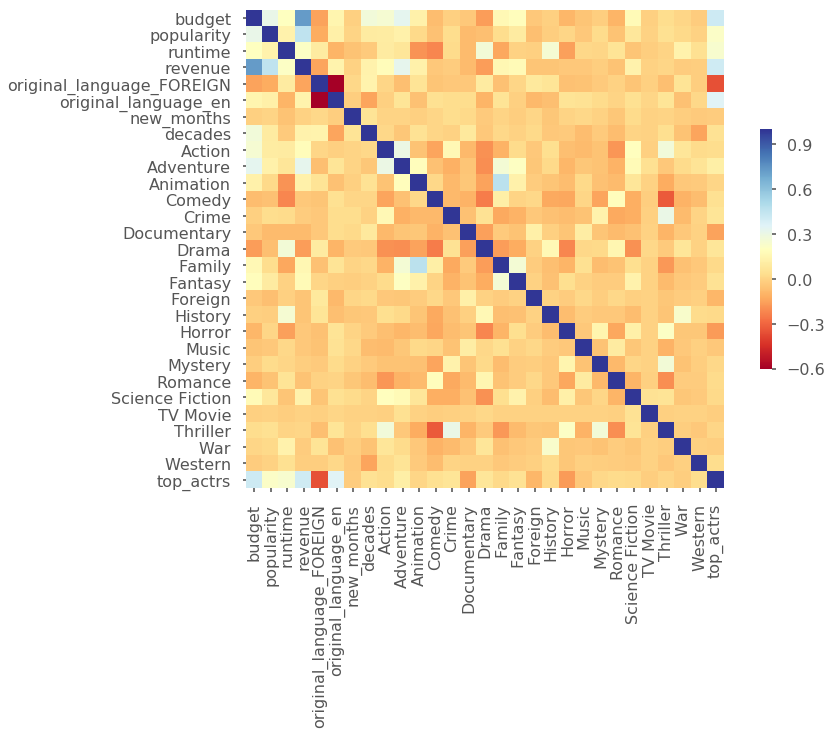

In [227]:
corr = train.corr()
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5})

In [191]:
train.corr()

,budget,popularity,runtime,revenue,original_language_FOREIGN,original_language_en,new_months,decades,Action,Adventure,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,top_actrs
budget,1.000000,0.316934,0.205900,0.730444,-0.148135,0.148135,-0.011419,0.271127,0.252891,0.335333,...,-0.087750,-0.043897,-0.014587,-0.098282,0.171678,-0.012179,0.036695,0.010808,-0.023931,0.416378
popularity,0.316934,1.000000,0.133968,0.461078,-0.121990,0.121990,0.001446,0.098152,0.104428,0.125103,...,0.012467,-0.035506,0.027849,-0.054640,0.080010,-0.005034,0.045994,0.018991,-0.000774,0.219489
runtime,0.205900,0.133968,1.000000,0.216691,0.099133,-0.099133,-0.051911,-0.028669,0.095988,0.072390,...,-0.153185,0.014626,0.009932,0.058110,-0.048153,-0.015609,0.004773,0.131663,0.049251,0.241054
revenue,0.730444,0.461078,0.216691,1.000000,-0.141707,0.141707,-0.000720,0.132715,0.184065,0.328130,...,-0.034427,-0.032431,-0.015009,-0.050004,0.132054,-0.003305,0.006335,-0.022915,-0.013604,0.408648
original_language_FOREIGN,-0.148135,-0.121990,0.099133,-0.141707,1.000000,-1.000000,0.012609,0.139106,0.010059,-0.067562,...,-0.062054,-0.053955,-0.028123,-0.006129,-0.045075,-0.007407,-0.068084,0.058233,-0.016642,-0.350763
original_language_en,0.148135,0.121990,-0.099133,0.141707,-1.000000,1.000000,-0.012609,-0.139106,-0.010059,0.067562,...,0.062054,0.053955,0.028123,0.006129,0.045075,0.007407,0.068084,-0.058233,0.016642,0.350763
new_months,-0.011419,0.001446,-0.051911,-0.000720,0.012609,-0.012609,1.000000,0.061201,0.002752,0.005033,...,0.000663,0.013963,-0.004074,-0.039790,0.026093,-0.003060,0.003081,-0.015235,-0.031035,-0.020705
decades,0.271127,0.098152,-0.028669,0.132715,0.139106,-0.139106,0.061201,1.000000,0.016847,-0.042789,...,-0.027963,-0.073944,-0.025411,-0.073356,0.002223,-0.006112,0.042803,-0.051545,-0.143622,0.055980
Action,0.252891,0.104428,0.095988,0.184065,0.010059,-0.010059,0.002752,0.016847,1.000000,0.302646,...,-0.063114,-0.080802,-0.051980,-0.176070,0.196799,-0.010487,0.269981,0.069966,0.028325,0.031699
Adventure,0.335333,0.125103,0.072390,0.328130,-0.067562,0.067562,0.005033,-0.042789,0.302646,1.000000,...,-0.091532,-0.040295,-0.050151,-0.100354,0.173881,0.044096,-0.033711,0.028023,0.061054,0.116144


The most correlated features to revenue according to the above matrix are : **Budget, Sci-fi, Fantasy, Family, Animation, Popularity, Decades, Action, Run time, Adventure, the two languges and Top Actors.**

Lets see how movie budgets have changed through the decades:

In [213]:
#use the train_budget_dict data for graph
budgets = []
decades = [20,30,40,50,60,70,80,90,100,110]
for decade in decades:
    budgets.append(train_budget_dict[decade])

In [214]:
budgets

[288180.4,
 769465.5,
 1138492.09,
 2247582.95,
 5512374.43,
 4585680.9,
 7872790.78,
 21798811.37,
 29281170.09,
 27277969.07]

In [222]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

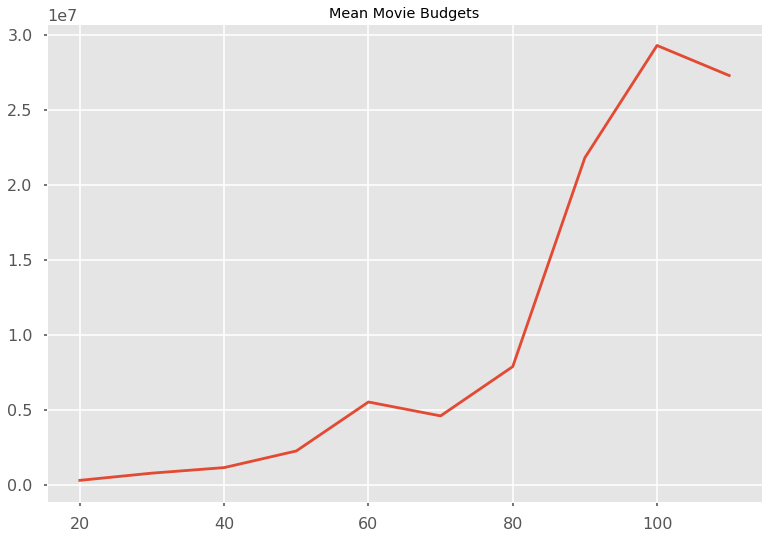

In [223]:
plt.plot(decades,budgets)
plt.title('Mean Movie Budgets')
plt.show()

And finally, lets plot a histogram of the number of A-list celebrities in a movie:

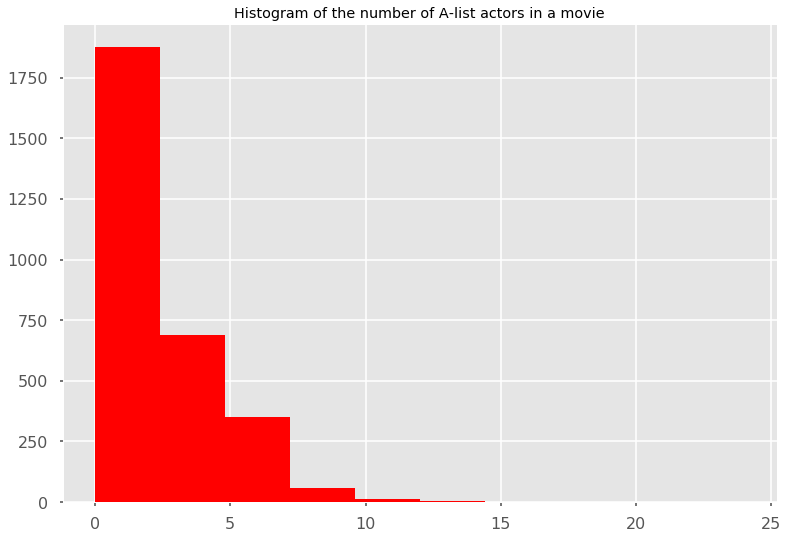

In [224]:
fig, ax = plt.subplots()
ax.hist(train.top_actrs, color = 'red')
ax.set_title('Histogram of the number of A-list actors in a movie')
plt.show()